In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sample_submission = pd.read_csv('sample_submission.csv.crdownload')
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
3166,6935_01,False
3167,6936_01,False
3168,6936_02,False
3169,6936_03,False


In [6]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

test_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


Looking at the top ten rows from the dataframe above, we can see that our output variable is Destination while our other variables are predictors. 

In [7]:
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [8]:
test_df.shape

(4277, 13)

In [9]:
destinations = test_df[["PassengerId","Destination"]]

print(destinations["Destination"].nunique())
print(destinations["Destination"].unique())
destinations["Destination"].value_counts()

3
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]


TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [10]:
print(f'{destinations["Destination"].isna().sum()} null values')

print(f'{destinations["Destination"].value_counts().sum() + destinations["Destination"].isna().sum()} of {len(destinations)} total records')

print(f'Null values are {100*(destinations["Destination"].isna().sum() / len(destinations["Destination"]))}% of the total')

92 null values
4277 of 4277 total records
Null values are 2.1510404489127897% of the total


Because null values in the output variable are only 2.15% of the total values, we will drop these records from the dataframe. 

We were able to observe three unique values within the output variable- TRAPPIST-1e, 55 Cancri e, PSO J318.5-22, with TRAPPIST having the most at nearly 3,000 of the records. This is good information to have going into the prediction analysis as we will have to take into consideration the heavier occurrence of TRAPPIST among the outputs. 

In [11]:
test_df = test_df.dropna(subset=["Destination"])
test_df.isna().sum()

PassengerId       0
HomePlanet       85
CryoSleep        90
Cabin           100
Destination       0
Age              86
VIP              90
RoomService      81
FoodCourt       106
ShoppingMall     95
Spa              99
VRDeck           74
Name             94
dtype: int64

In [12]:
print(test_df.shape)
test_df.head()

(4185, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


We might want to look at the distribution through a scatter plot of the output variable destination to help us get an intuition regarding our values. 

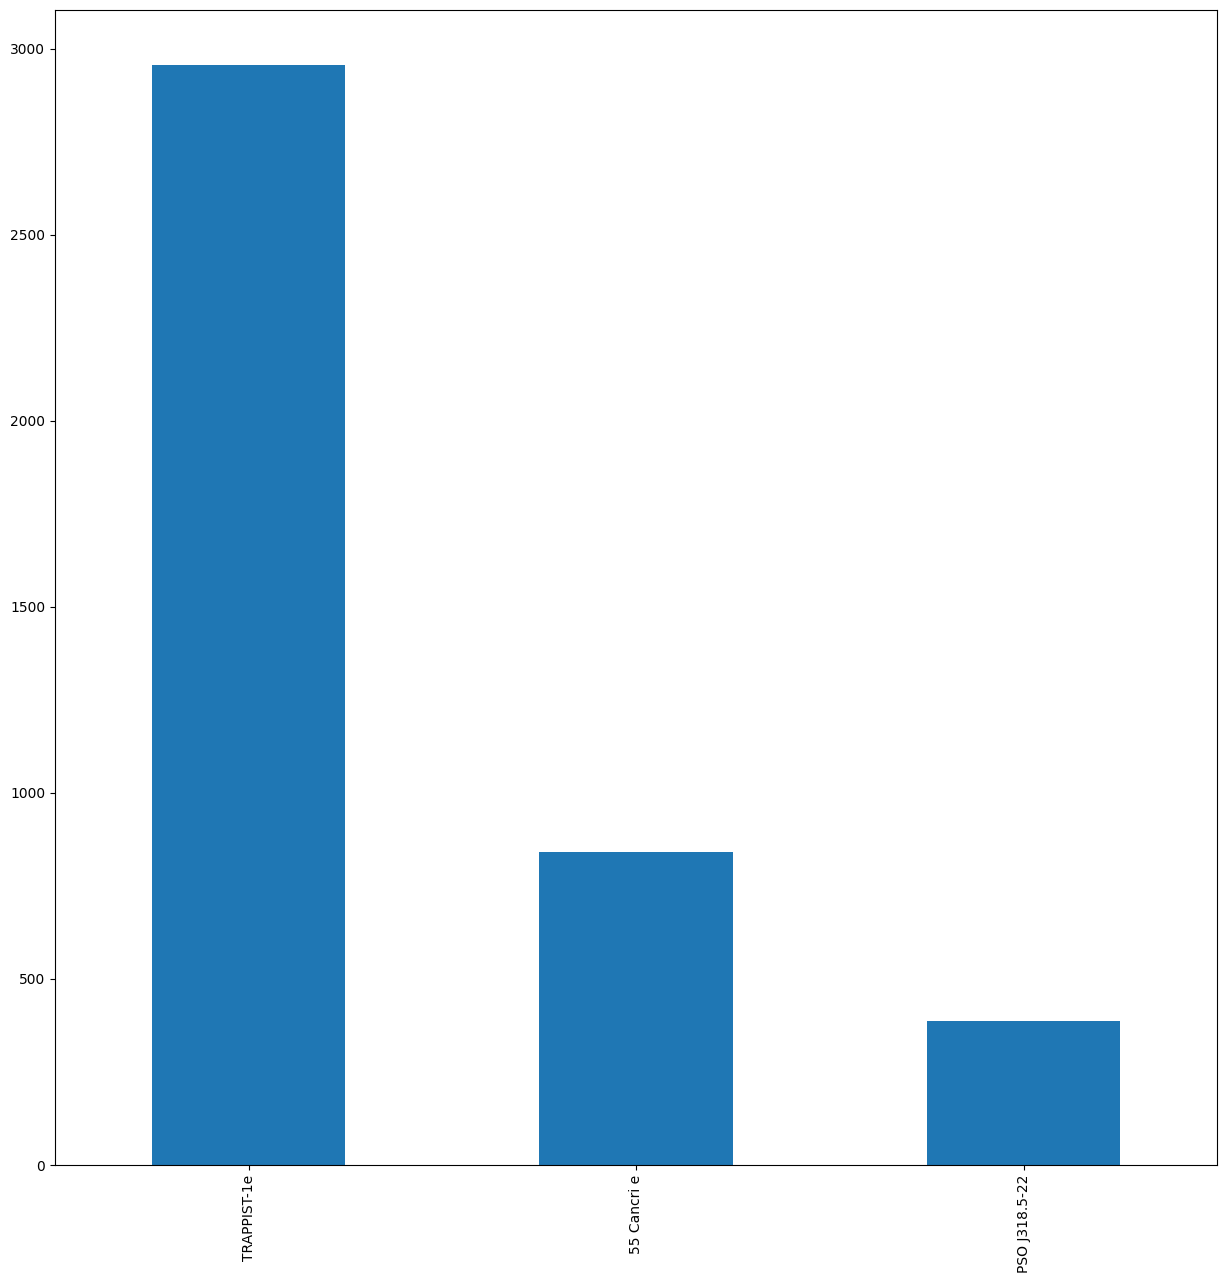

In [13]:
destination_counts = test_df["Destination"].value_counts()

plt.figure(figsize=(15,15))
destination_counts.plot(kind="bar")
plt.show()

Now that we have dropped the null values from the test dataframe, we can look for null values in the other columns. 

We also see that we have a heavy distribution towards TRAPPIST, which means we will likely need to keep this in mind when training the model since we might have an unfair emphasis from this destination. 

In [14]:
print("Count of null values by column:")
for col in test_df.columns:
    print(f'{col}: {test_df[col].isna().sum()}')
print("Percentage of null values by column:")
for col in test_df.columns:
    print(f'{col}: {round(100*(test_df[col].isna().sum() / len(test_df)),2)}%')

Count of null values by column:
PassengerId: 0
HomePlanet: 85
CryoSleep: 90
Cabin: 100
Destination: 0
Age: 86
VIP: 90
RoomService: 81
FoodCourt: 106
ShoppingMall: 95
Spa: 99
VRDeck: 74
Name: 94
Percentage of null values by column:
PassengerId: 0.0%
HomePlanet: 2.03%
CryoSleep: 2.15%
Cabin: 2.39%
Destination: 0.0%
Age: 2.05%
VIP: 2.15%
RoomService: 1.94%
FoodCourt: 2.53%
ShoppingMall: 2.27%
Spa: 2.37%
VRDeck: 1.77%
Name: 2.25%


We are able to see that no columns contain more than 2.53% null values, however, this does not mean we can simply drop all of the rows with null values as this could result in a substantial drop of rows if, for example, none of the rows coincide with other null values in a different column. We need to assess the potential damage. 

Looking at name, we likely do not need this column at all as these are simply names and if there is any correlation, it is likely a false lead. We will drop this column. 

In [15]:
test_df = test_df.drop(labels="Name",axis=1)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


We will not drop the PassengerId column, although this seems like it could be dropped, because the first four numbers are signifiers of a group, which might deprive us of a valuable metric. We will split this column into two metrics, the group and the ID, then we will drop the PassengerId and the ID columns. 

In [16]:
test_df[["GroupId","ID"]] = test_df["PassengerId"].str.split(pat='_',expand=True)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,ID
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01


In [17]:
test_df = test_df.drop(labels=["PassengerId","ID"],axis=1)
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023


With these removed, we should investigate the columns more fully- specifically to determine the importance of the null values and whether we can drop them or if we have to keep them. 

We will begin with HomePlanet. 

In [18]:
test_df["HomePlanet"].value_counts()

Earth     2218
Europa     982
Mars       900
Name: HomePlanet, dtype: int64

We had 85 null values in this particular column and we see a 50-25-25 split for three home planet categories: Earth, Europa, and Mars. Since there are not many null variables. We will attempt to look at a few columns where the HomePlanet is null and see how many of the other columns also conain null values. 

In [19]:
test_df[test_df["HomePlanet"].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
276,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,0616
340,NaN,False,F/135/S,TRAPPIST-1e,44.0,False,14.0,0.0,1817.0,2.0,171.0,0730
450,NaN,False,F/171/S,TRAPPIST-1e,20.0,False,0.0,4.0,0.0,732.0,1.0,0936
464,NaN,False,F/180/S,TRAPPIST-1e,19.0,False,1.0,0.0,0.0,0.0,632.0,0967
481,NaN,False,F/192/S,TRAPPIST-1e,23.0,False,0.0,458.0,151.0,256.0,0.0,1021
...,...,...,...,...,...,...,...,...,...,...,...,...
3957,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,8621
3980,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,8678
4032,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,8775
4159,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,9025


Looking at this does not seem to give us much as far as null values cross columns, but we can look at a few columns against the HomePlanet column to see if there are many overlaps. 

In [20]:
test_df[test_df["HomePlanet"].isna() & test_df["FoodCourt"].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
991,NaN,True,G/332/P,PSO J318.5-22,6.0,False,0.0,NaN,0.0,0.0,0.0,2057
3945,NaN,True,C/322/S,55 Cancri e,25.0,False,0.0,NaN,0.0,0.0,0.0,8576


In [21]:
test_df.loc[test_df["HomePlanet"].isna() & test_df["ShoppingMall"].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId
276,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,0616
488,NaN,True,G/157/P,TRAPPIST-1e,NaN,False,0.0,0.0,NaN,0.0,0.0,1050
3093,NaN,True,A/83/S,55 Cancri e,59.0,False,0.0,0.0,NaN,0.0,0.0,6781


These do not seem to offer much overlap between columns in terms of null values, which would seem to discourage dropping all. Dropping all rows with null values could take away up to 25% of our data, leaving us with roughly 3139 rows left. 

We will try two methods:
1. First, we will try to simply remove all null values and proceed with the data through modeling to see what kind of performance we have. 
2. Second, we will attempt a few other complicated means of dealing with the null values such as imputation through either regression or averaging and then use modeling to determine if the performance is better. 

We do want to simplify the data, but we do not want to lose predictive value in doing so, which means we should test our options and keep track of the different performances of each. 

## 1. Drop Null Values and store in a new dataframe before cleaning

In [22]:
nn_test_df = test_df.dropna(axis=0,inplace=False)
for col in nn_test_df:
    print(f'{col}: {nn_test_df[col].isna().sum()}')

HomePlanet: 0
CryoSleep: 0
Cabin: 0
Destination: 0
Age: 0
VIP: 0
RoomService: 0
FoodCourt: 0
ShoppingMall: 0
Spa: 0
VRDeck: 0
GroupId: 0


We have confirmed the dropping of null values from the dataframe. Let's check two elements before proceeding:
1. Did we accidentally drop null values from the other dataframe?
2. How many rows did this result in us dropping?

In [23]:
for col in test_df:
    print(f'{col}: {test_df[col].isna().sum()}')
print('\n')
print(nn_test_df.shape,'\n')
print(len(test_df) - len(nn_test_df))

HomePlanet: 85
CryoSleep: 90
Cabin: 100
Destination: 0
Age: 86
VIP: 90
RoomService: 81
FoodCourt: 106
ShoppingMall: 95
Spa: 99
VRDeck: 74
GroupId: 0


(3355, 12) 

830


Success on the first question! New dataframe with no null values while maintaining the null values in the old dataframe. 

To the second question, we dropped 830 records, but as this is only about 20% of what we started with, I am not too concerned, not until we are able to see the performance of a few models. 

Since we have cleaned the data of null values, we can look at our columns for more information on data types, as well as distributions amongst each for more information that could result in further cleaning or reclassifying. This will also set the stage for dummy variables. 

In [24]:
nn_test_df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
GroupId          object
dtype: object

Out of our twenlve columns, we can see that six of these columns are float64 or numerical. These are columns we can examine at a high level using describe(), which will give us summary statistics, which might help identify outliers. We will also use a boxplot to visualize many of these same numbers. 

In [25]:
nn_test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000
mean,28.596423,218.863189,436.444709,175.073621,299.111773,296.185395
std,14.135552,614.390307,1478.493576,569.121574,1091.202336,1161.310827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,26.000000,47.500000,34.000000
max,79.000000,11567.000000,20809.000000,8292.000000,15733.000000,19086.000000


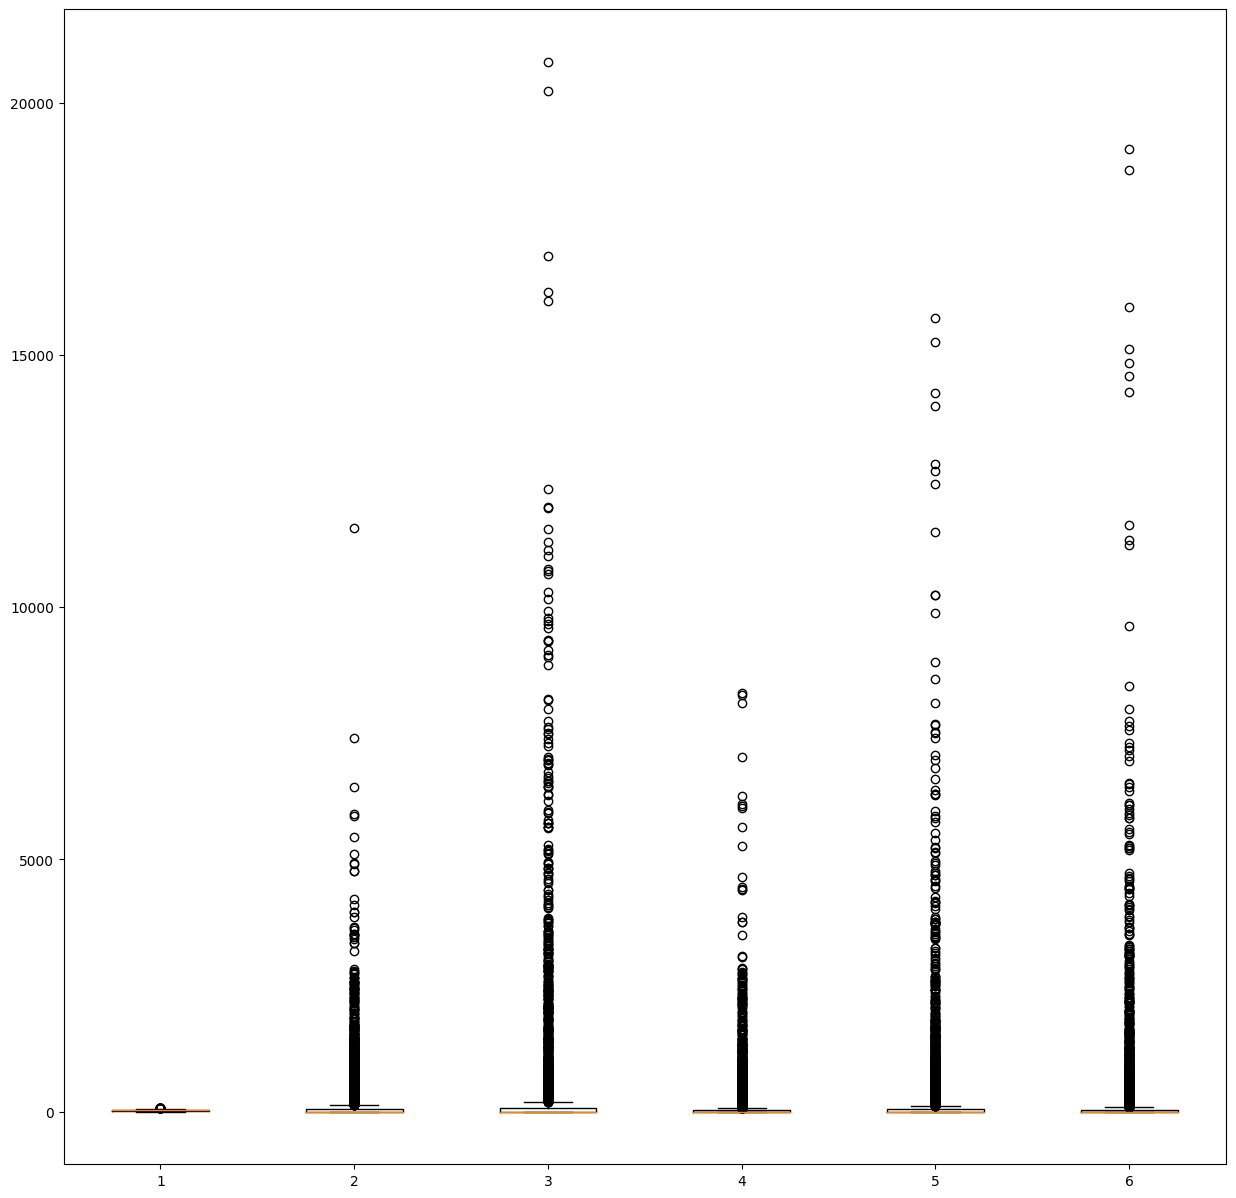

In [26]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])
plt.show()

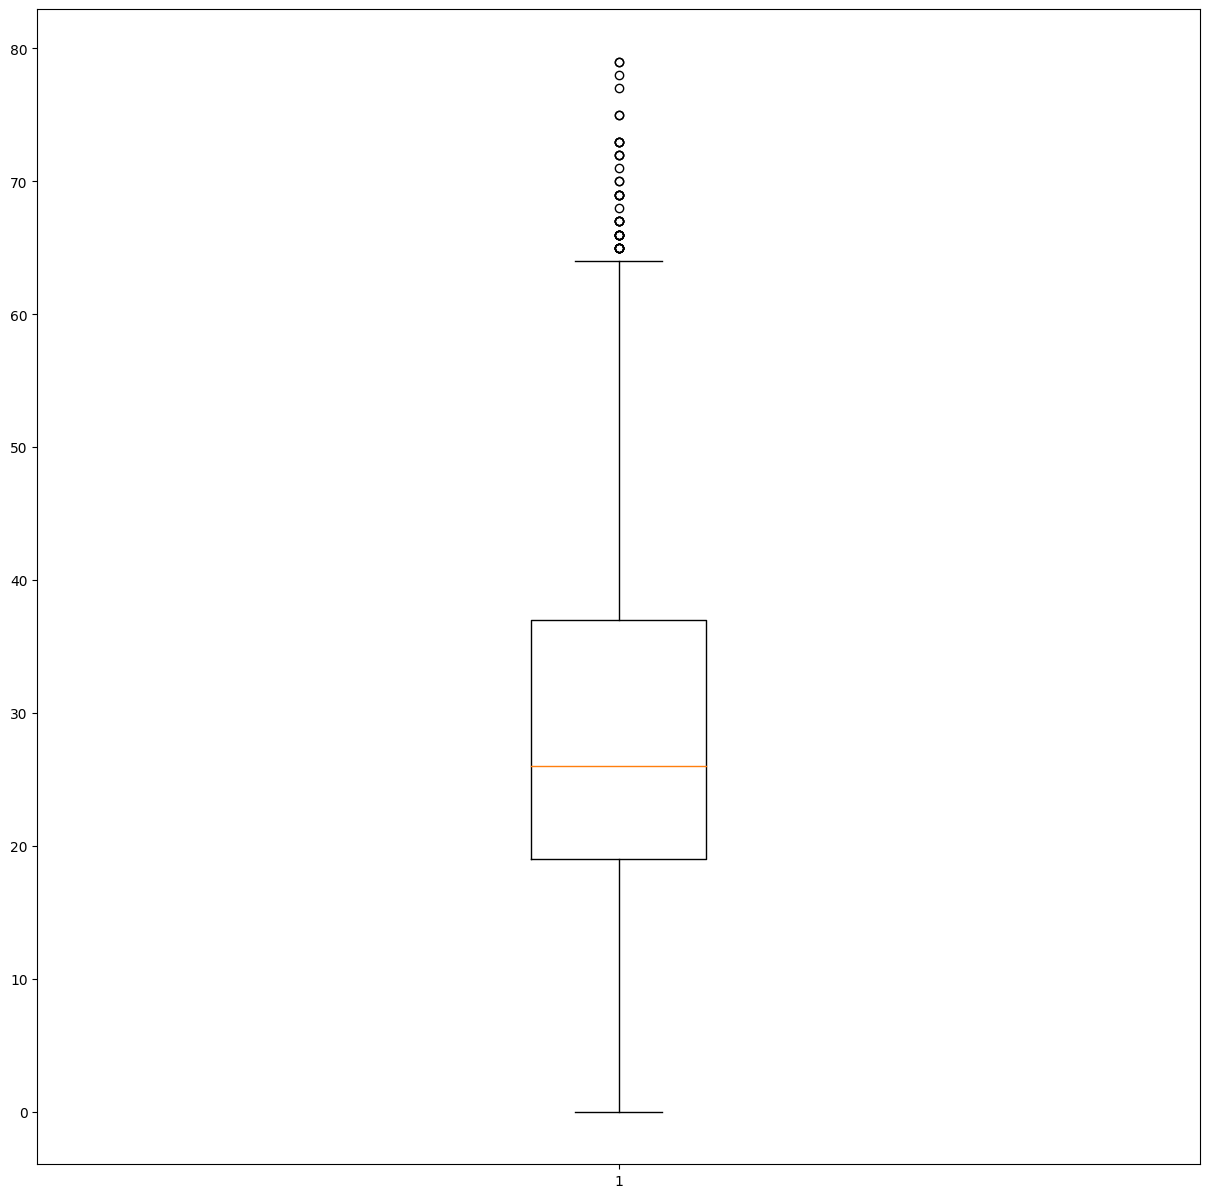

In [27]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df["Age"])
plt.show()

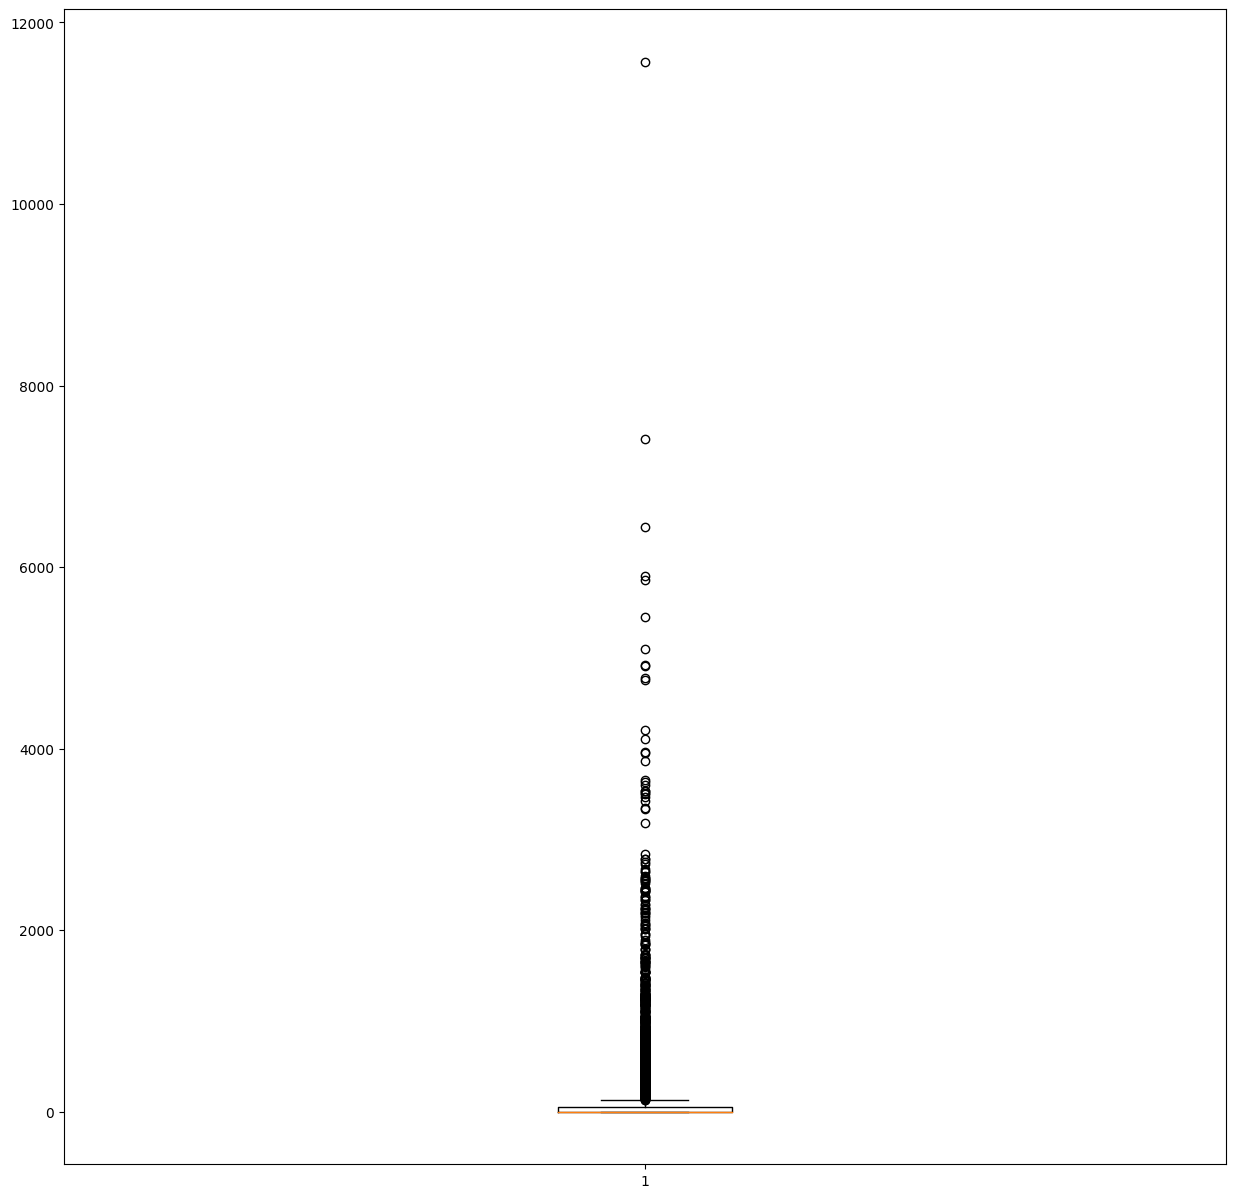

In [28]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df["RoomService"])
plt.show()

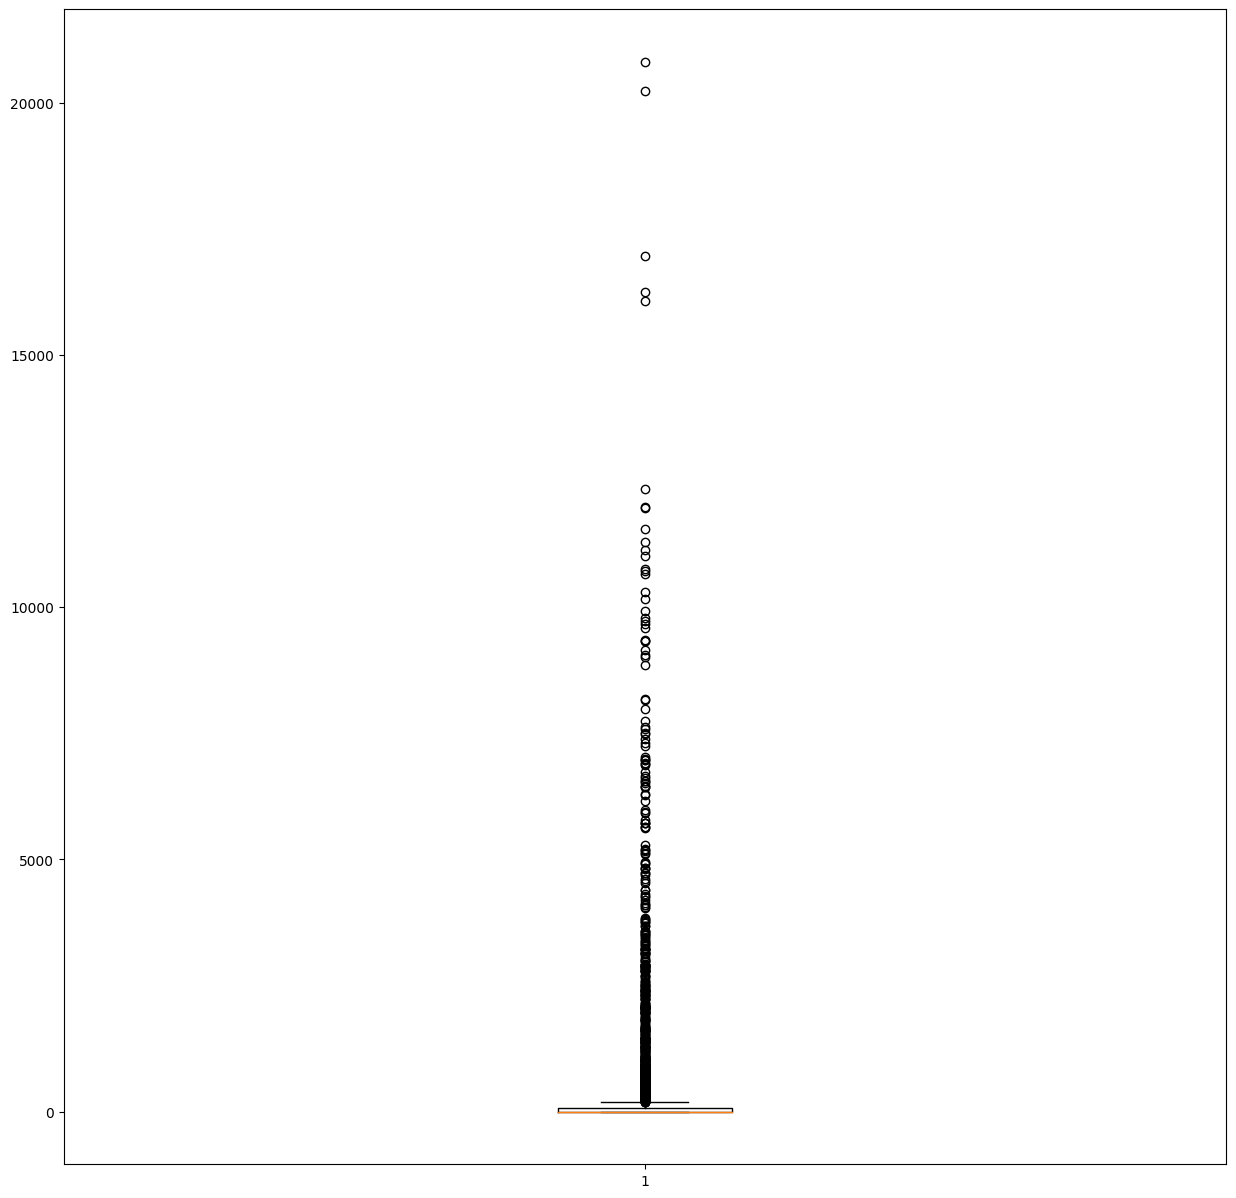

In [29]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df["FoodCourt"])
plt.show()

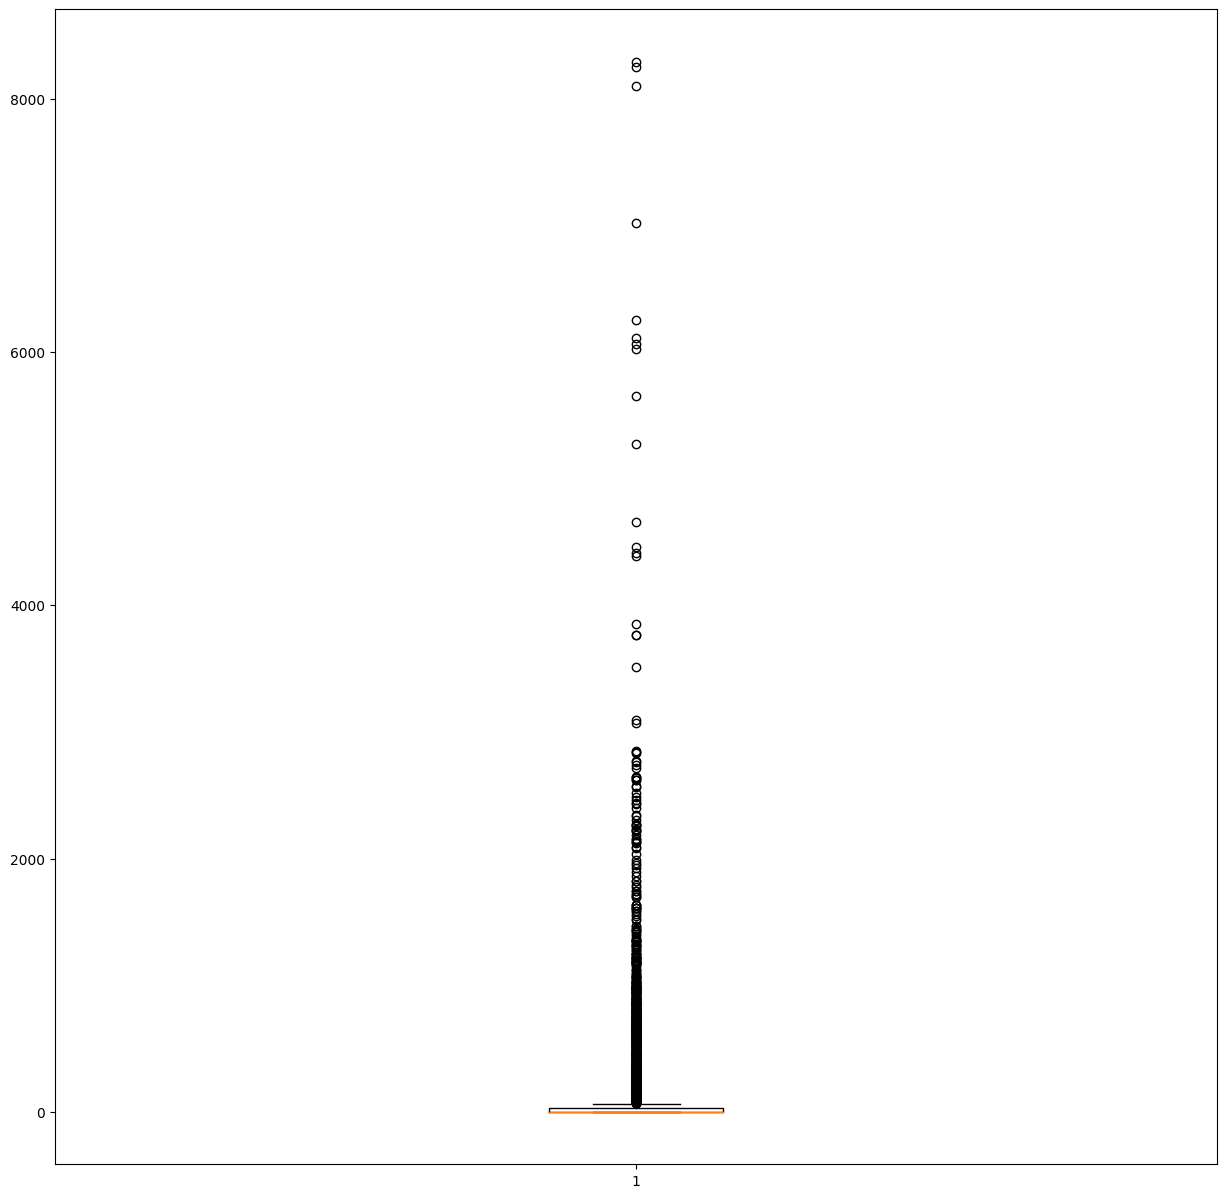

In [30]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df["ShoppingMall"])
plt.show()

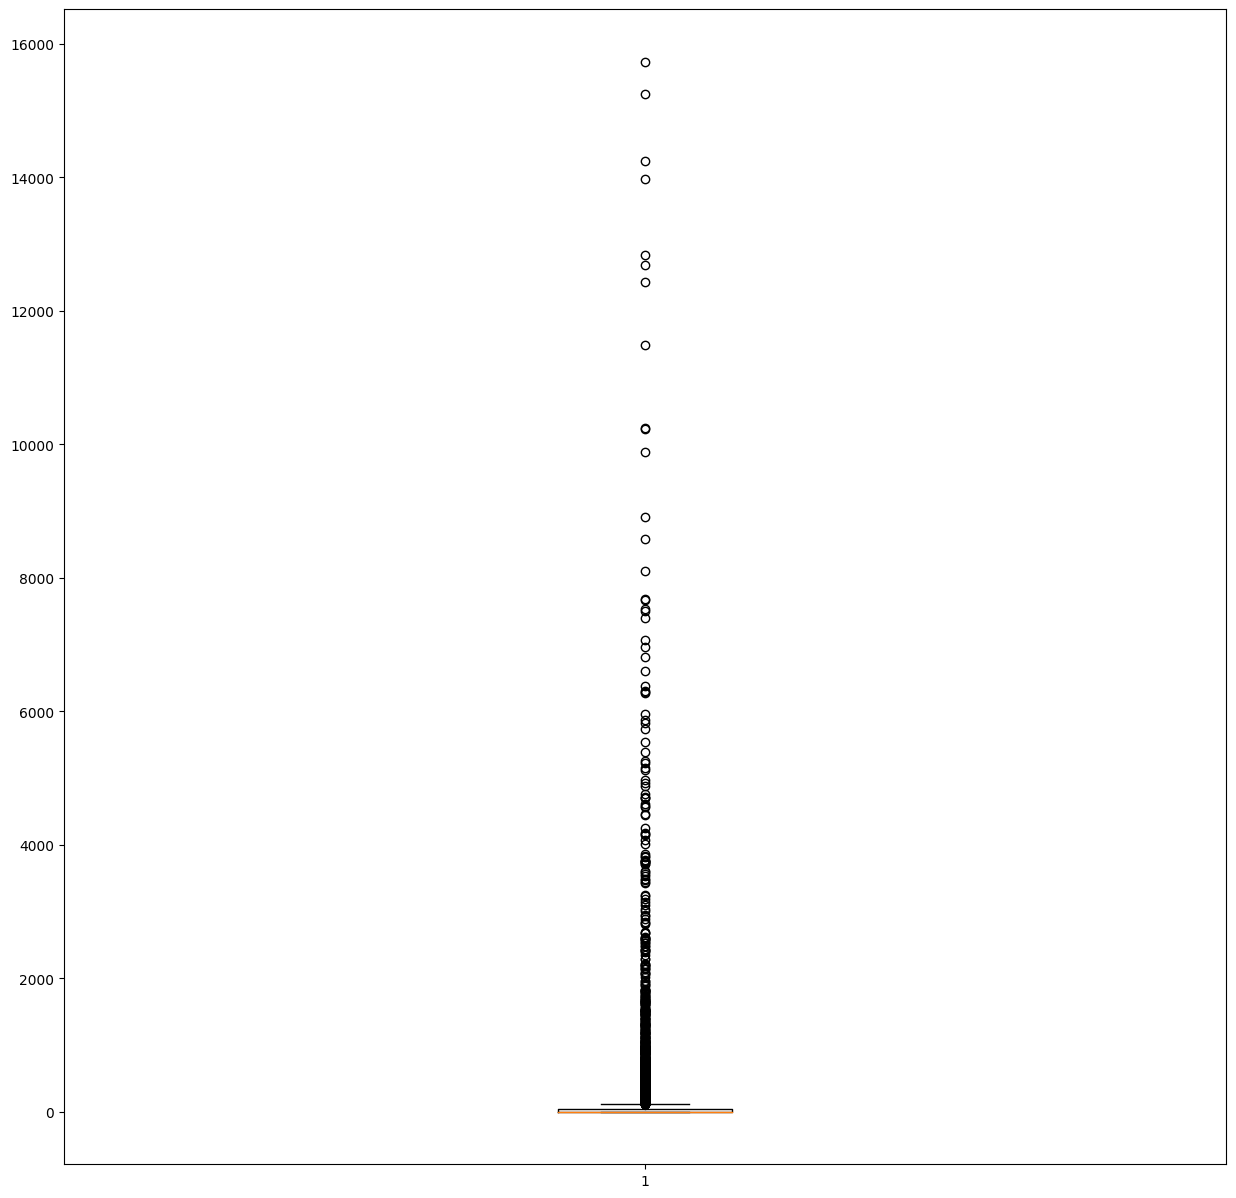

In [31]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df["Spa"])
plt.show()

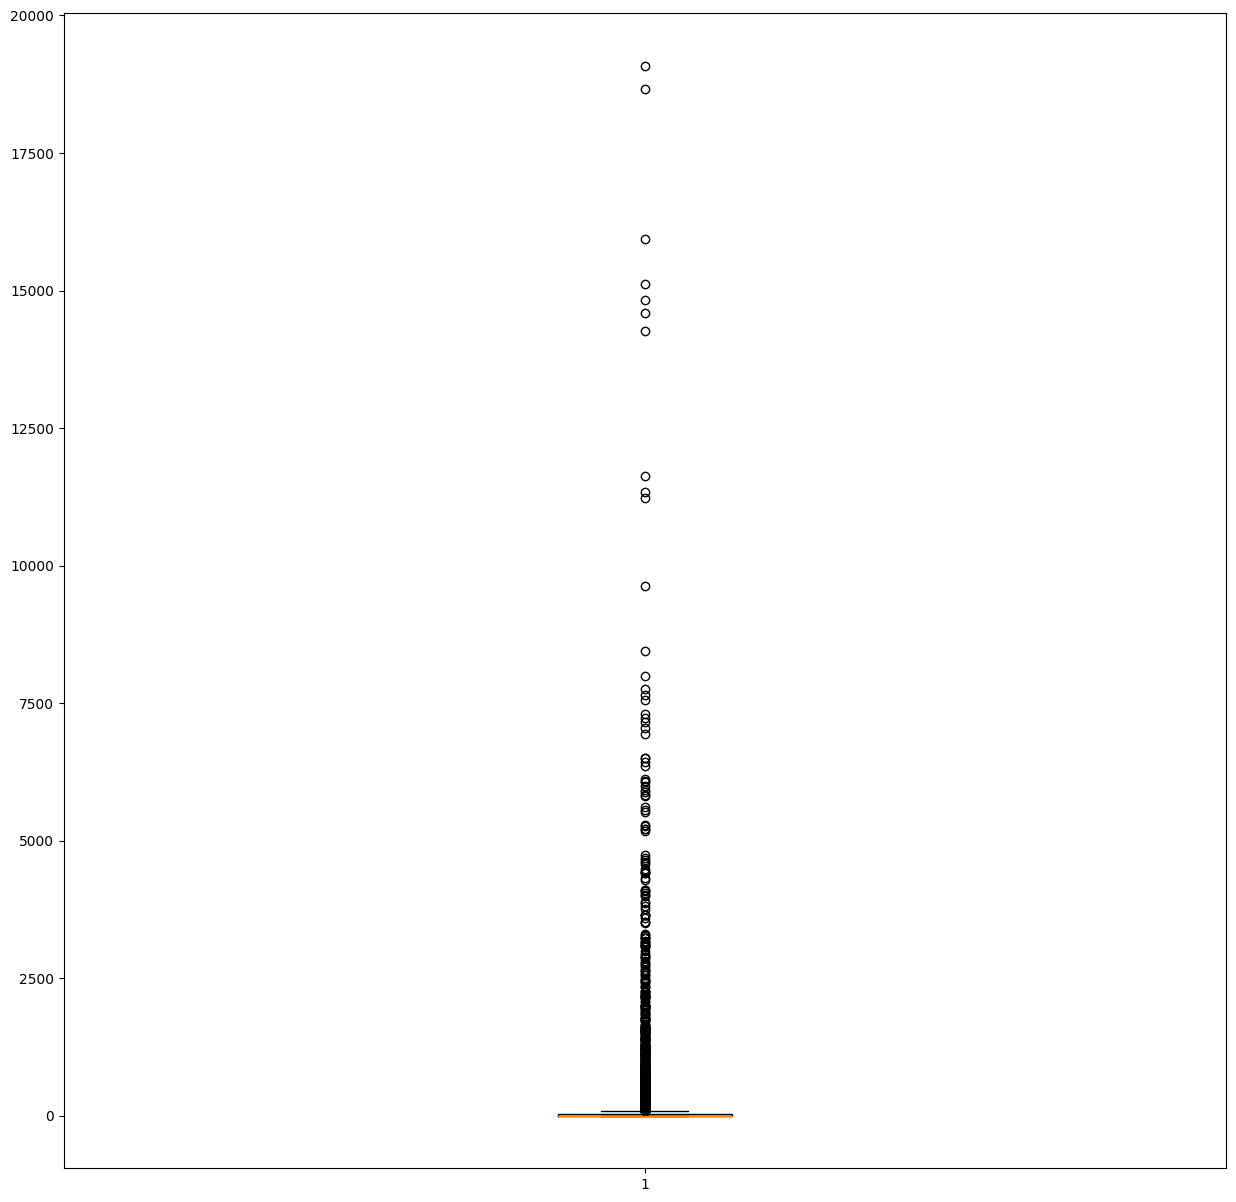

In [32]:
plt.figure(figsize=(15,15))
plt.boxplot(nn_test_df["VRDeck"])
plt.show()

Looking at these plots shows us that we likely have a substantial amount of either zero values or lower values that result in outliers. From the first ten rows we saw above, it seems likely these columns contain a substantial amount of zero values. We can go through each of these one by one and assess how many zeroes they contain to see if we can keep them, if we need to drop them, or even if there is any statistical significance. 

Looking first at RoomService

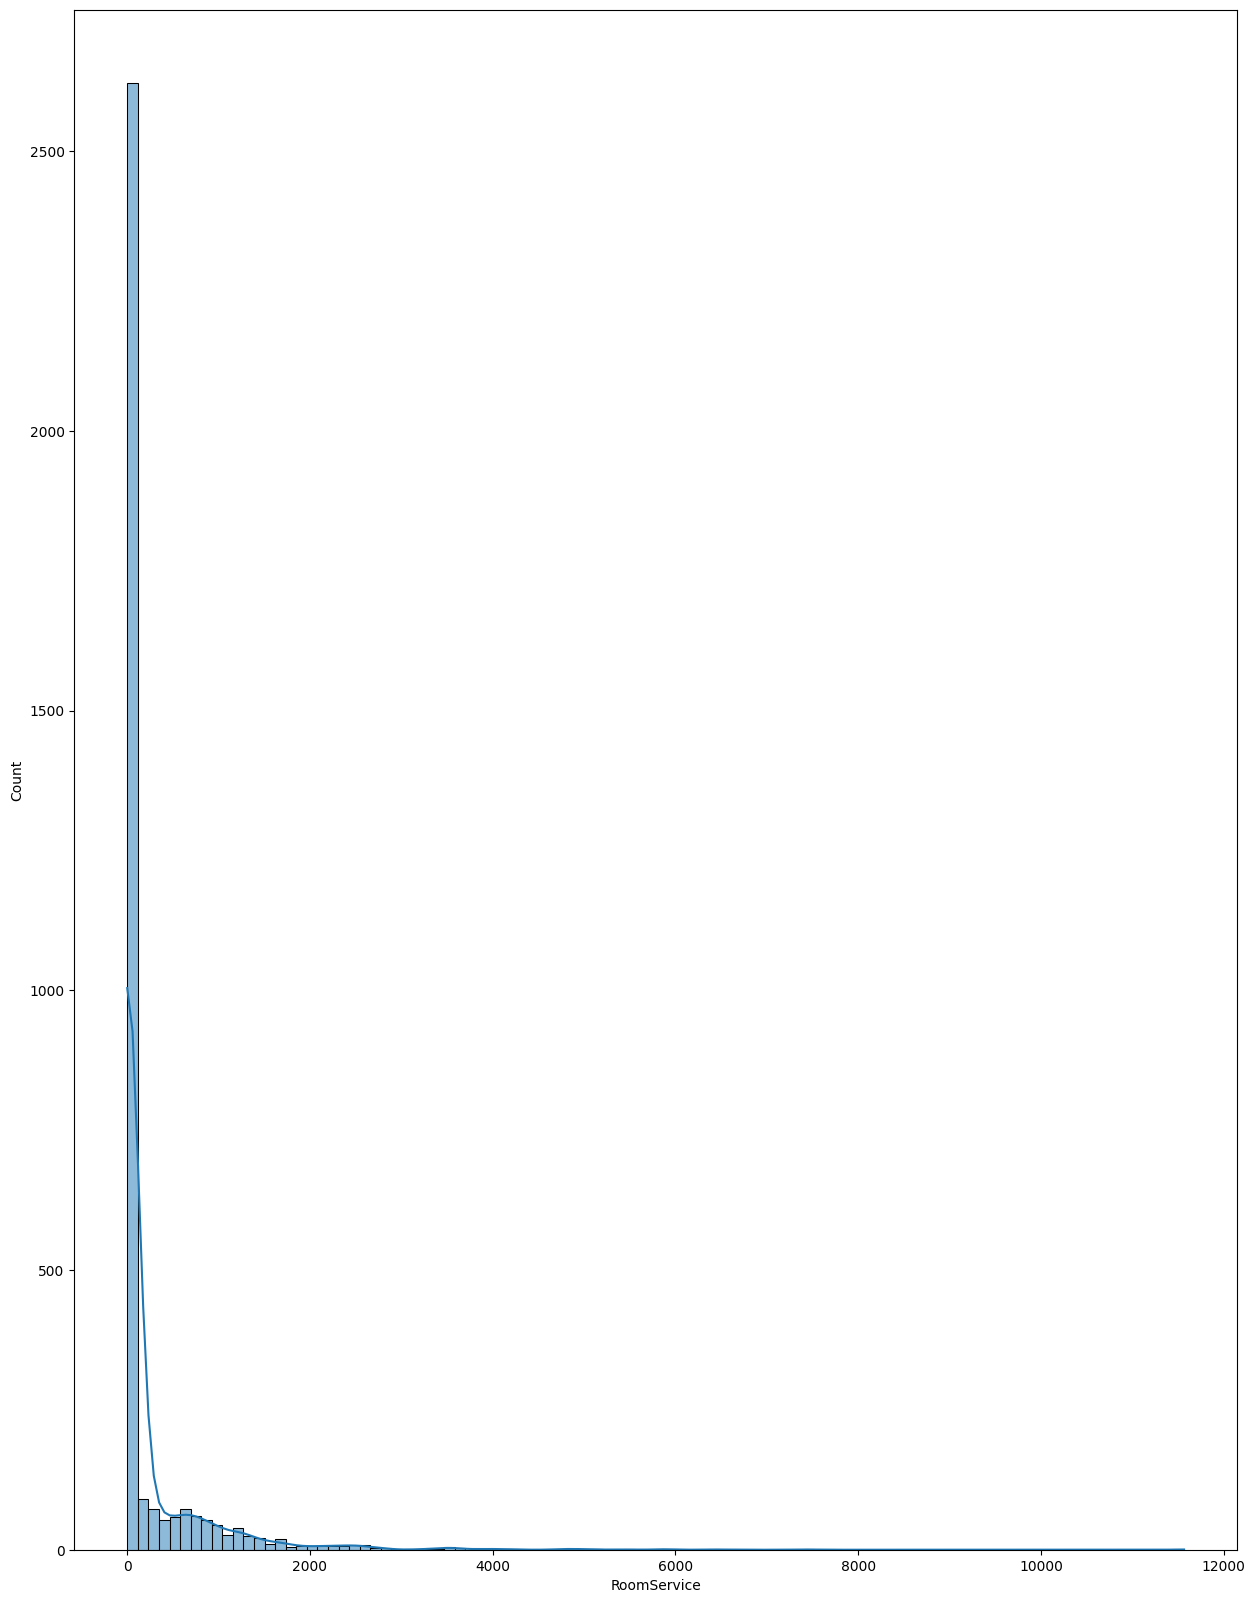

In [33]:
plt.figure(figsize=(15,20))
sns.histplot(nn_test_df["RoomService"],bins=100,kde=True)
plt.show()

In [34]:
# hard numbers
rs_counts = nn_test_df["RoomService"].value_counts()
rs_counts

0.0       2191
1.0         51
3.0         25
2.0         24
4.0         18
          ... 
337.0        1
596.0        1
1253.0       1
209.0        1
147.0        1
Name: RoomService, Length: 719, dtype: int64